#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 11s 0us/step


Let's take a look at a sample of the images in the dataset:

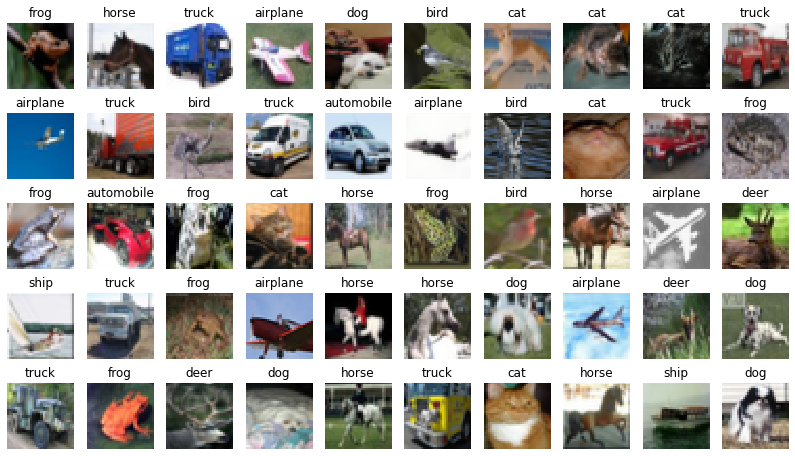

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = np.mean(X_train, axis=0)
st_deviation = np.std(X_train, axis=0)
   


X_train = (X_train - mean) / st_deviation
X_valid = (X_valid - mean) / st_deviation
X_test = (X_test - mean) / st_deviation


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 13s 9ms/step - loss: 1.4635 - accuracy: 0.4877 - val_loss: 1.2465 - val_accuracy: 0.5672
Epoch 2/10
352/352 [==============================] - 3s 8ms/step - loss: 1.1547 - accuracy: 0.5998 - val_loss: 1.1168 - val_accuracy: 0.6054
Epoch 3/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0401 - accuracy: 0.6412 - val_loss: 1.0744 - val_accuracy: 0.6270
Epoch 4/10
352/352 [==============================] - 3s 9ms/step - loss: 0.9609 - accuracy: 0.6722 - val_loss: 1.0394 - val_accuracy: 0.6390
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9069 - accuracy: 0.6906 - val_loss: 1.0338 - val_accuracy: 0.6466
Epoch 6/10
352/352 [==============================] - 3s 9ms/step - loss: 0.8704 - accuracy: 0.7010 - val_loss: 1.0260 - val_accuracy: 0.6460
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.8370 - accuracy: 0.7153 - val_loss: 1.0178 - val_accuracy: 0.6494
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0333 - accuracy: 0.6509 - 945ms/epoch - 3ms/step
accuracy: 65.09%


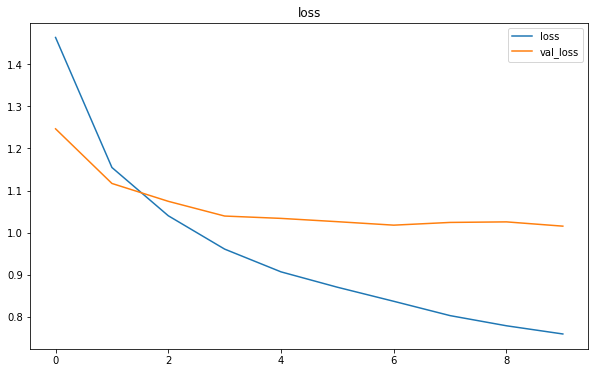

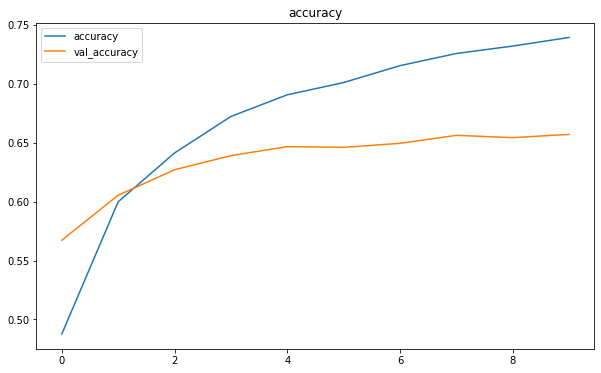

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

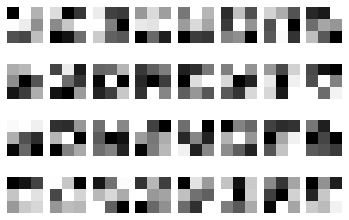

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number of parameters is 896 because there are 32 filters with 3x3 dimension. So each filter has 9 parameters and because the input is composed of 3 layers the multiplication is 32 * 3 * 3 * 3 that is equal to 864 and then we add the bias so 864 + 32 = 896.
With the same method we find that 16 * 2 * 2 * 32 + 16 = 2064
2.   The two convolutional layers has different parameters because the input is different. Indeed the first conv2d layer has in input data with shape (32,32,3) and output (30,30,32), the maxpool layer with 2x2 dimension reduce the dimension at (15,15,32) that is the input of the second conv2d layer. Then this is the reason why the two layers have different numbers of parameters. 

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 4s 10ms/step - loss: 1.6311 - accuracy: 0.4189 - val_loss: 1.3672 - val_accuracy: 0.5246
Epoch 2/10
352/352 [==============================] - 3s 9ms/step - loss: 1.2957 - accuracy: 0.5441 - val_loss: 1.2444 - val_accuracy: 0.5686
Epoch 3/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1880 - accuracy: 0.5836 - val_loss: 1.1735 - val_accuracy: 0.5898
Epoch 4/10
352/352 [==============================] - 3s 9ms/step - loss: 1.1255 - accuracy: 0.6083 - val_loss: 1.1268 - val_accuracy: 0.6068
Epoch 5/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0698 - accuracy: 0.6302 - val_loss: 1.0737 - val_accuracy: 0.6304
Epoch 6/10
352/352 [==============================] - 3s 9ms/step - loss: 1.0298 - accuracy: 0.6419 - val_loss: 1.0381 - val_accuracy: 0.6382
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9941 - accuracy: 0.6573 - val_loss: 1.0140 - val_accuracy: 0.6510
Epoch

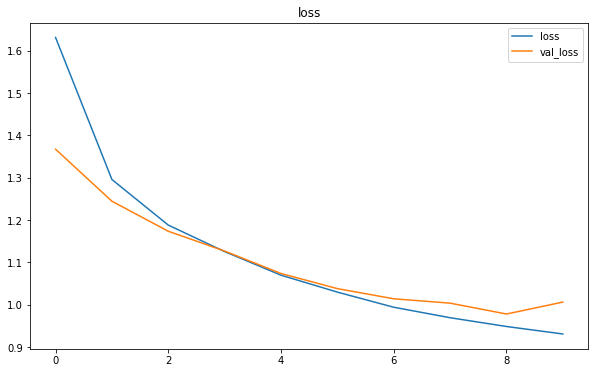

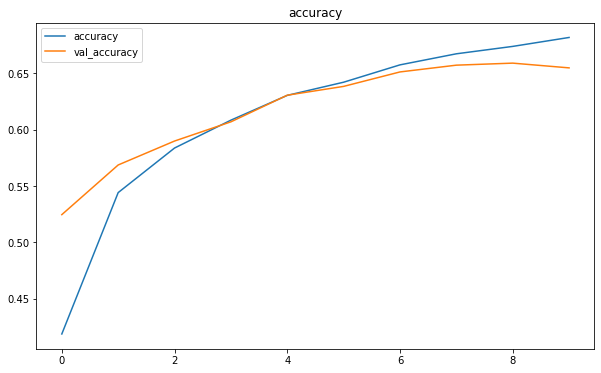

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 128)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 7, 7, 64)         

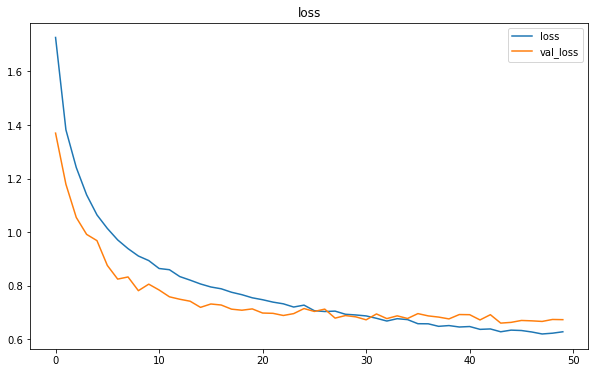

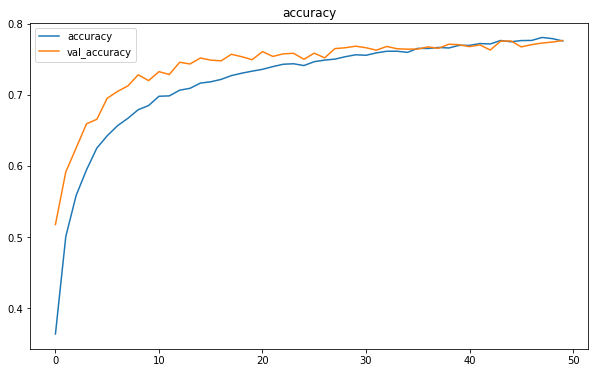

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found
- Convolutional 2D layer with 128 filters, dimension 3x3, activation 'relu'
- Maxpooling 2D layer with dimension 2x2
- Dropout 0.3
- Convolutional 2D layer with 64 filters, dimension 2x2, activation 'relu'
- Maxpooling 2D layer with dimension 2x2
- Dropout 0.4
- Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
- Flatten layer
- Dense layer 0.4
- Dense layer with 100 neurons and activation 'relu'
- Dense layer with 10 neurons and activation 'softmax'

Adam optimizer

Batch size = 128

Epoch = 50

Loss = 0.6821

The achieved accuracy in the test set is ... 77.06%

Discussion:
After checking various models I added a convolutional layer to the previous model. I increased the number of filters and added 3 dropout layers and a dense layer. I also tried to add l1 regularization in the dense and convolutional layers but the performance decreased

Besides, I tested also other models: 
* 1
      - Convolutional 2D layer with 64 filters, dimension 4x4, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Flatter layer
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 32
      Epoch = 10
      Accuracy = 67.16%
      Loss = 0.9768

* 2
      - Convolutional 2D layer with 32 filters, dimension 4x4, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Flatter layer
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 32
      Epoch = 10
      Accuracy = 69.01%
      Loss = 0.9175

* 3
      - Convolutional 2D layer with 64 filters, dimension 3x3, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Flatter layer
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 128
      Epoch = 30
      Accuracy = 69.88%
      Loss = 0.9587

* 4
      - Convolutional 2D layer with 64 filters, dimension 3x3, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 64 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Flatter layer
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 128
      Epoch = 10
      Accuracy = 71.48%
      Loss = 0.8582

* 5
      - Convolutional 2D layer with 128 filters, dimension 3x3, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 64 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Flatten layer
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 128
      Epoch = 10
      Accuracy = 71.55%
      Loss = 0.8266

* 6
      - Convolutional 2D layer with 128 filters, dimension 3x3, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Dropout 0.3
      - Convolutional 2D layer with 64 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Dropout 0.4
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Flatten layer
      - Dense layer 0.3
      - Dense layer with 100 neurons and activation 'relu'
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 64
      Epoch = 50
      Accuracy = 76.66%
      Loss = 0.7049

* 7
      - Convolutional 2D layer with 128 filters, dimension 3x3, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Dropout 0.3
      - Convolutional 2D layer with 64 filters, dimension 2x2, activation 'relu'
      - Maxpooling 2D layer with dimension 2x2
      - Dropout 0.4
      - Convolutional 2D layer with 32 filters, dimension 2x2, activation 'relu'
      - Flatten layer
      - Dense layer 0.4
      - Dense layer with 100 neurons and activation 'relu'
      - Dense layer with 10 neurons and activation 'softmax'
      Adam optimizer
      Batch size = 128
      Epoch = 50
      Accuracy = 76.60%
      Loss = 0.9928






Discussion:
I tried to change one hyperparameter at the time.
The biggest increase is when I added the dropout layers and when I increased the numbers of epochs.